# K-Nearest Neighbor (K-NN) Classifier

[K-NN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a straight-forward algorithm that 'memorize' all known data and classifies new cases based on similarity measure such as [L2 distance](https://en.wikipedia.org/wiki/Euclidean_distance). It is one of the simpliest algorithms in machine learning. Training is fast (just store and indexing data) but memory hungry. Test is slow because computations are performed at test time over each and every stored training data.

Recent research try to accelerate nearest neighbor searching, such as [Approximate Nearest Neighbor](https://www.cs.umd.edu/~mount/ANN/) (ANN).

Initially i wanted to apply K-NN on [tiny imagenet](https://tiny-imagenet.herokuapp.com/) data set TinyImageNet-100-B, but turns out the dataset is too memory hungry for my Lenovo W530 laptop to handle. So I switched to [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)

K-NN L2 distaince computation is implemented in two flavors, one uses vanilla Numpy and the 2nd one uses tensorflow.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from utility.dataloading import *
import random

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


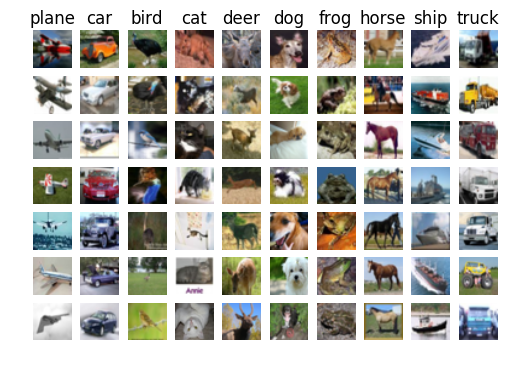

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [4]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [5]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape

(5000, 3072) (500, 3072)


In [6]:
#from utility import KNearestNeighbor
from k_nearest_neighbor import *
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [7]:
dists = classifier.compute_distances_numpy(X_test)
print dists.shape

(500, 5000)


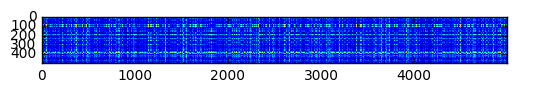

In [8]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

In [9]:
# Now with Nearest Neighbor
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


In [10]:
# Let's compare how fast the implementations are
def time_function(f, *args):
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  import time
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

In [11]:
# Using TensorFlow version to compute L2 distance
tf_dists = classifier.compute_distances_tf(X_test)
print tf_dists.shape

(500, 5000)


In [12]:
# check that the distance matrix agrees with each other in Numpy and TensorFlow
difference = np.linalg.norm(dists - tf_dists, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
  print 'Good! The distance matrices are the same'
else:
  print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


In [13]:
# Using Numpy to compute L2 distance
numpy_knn_time = time_function(classifier.compute_distances_numpy, X_test)
print 'Numpy version KNN took %f seconds' % numpy_knn_time
tf_knn_time = time_function(classifier.compute_distances_tf, X_test)
print 'TensorFlow version KNN took %f seconds' % tf_knn_time

Numpy version KNN took 0.320118 seconds
TensorFlow version KNN took 0.474164 seconds
